# Library loading

In [1]:
%matplotlib inline

import pandas as pd # manipulate dataframes
import matplotlib.pyplot as plt # plotting
import matplotlib
import numpy as np
import rampy as rp

from sklearn.metrics import mean_squared_error

np.random.seed(42) # fixing random seed

# Data generation

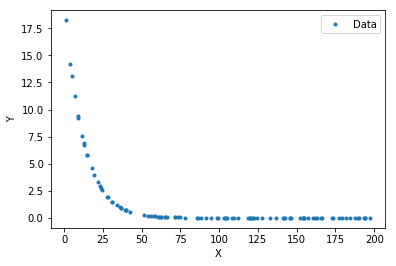

In [2]:
x = np.random.rand(100)*200
y = 20*np.exp(-x/12)

plt.plot(x,y,".",label="Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Data pre-processing, model definition and train!

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
Y_scaler = StandardScaler()
X_scaler.fit(x.reshape(-1,1))
Y_scaler.fit(y.reshape(-1,1))

x_sc = X_scaler.transform(x.reshape(-1,1))
y_sc = Y_scaler.transform(y.reshape(-1,1))

model_shallow = MLPRegressor(hidden_layer_sizes=(20, ), activation='relu', solver='adam',
                             learning_rate_init=0.01,max_iter=5000,
                             early_stopping=True,validation_fraction=0.2)
model_shallow.fit(x_sc.reshape(-1,1),y.reshape(-1,1))

model_deep = MLPRegressor(hidden_layer_sizes=(20,20,20,20 ), activation='relu', solver='adam',
                             learning_rate_init=0.01,max_iter=5000,
                             early_stopping=True,validation_fraction=0.2)
model_deep.fit(x_sc.reshape(-1,1),y.reshape(-1,1))


/home/charles/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/charles/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20, 20), learning_rate='constant',
       learning_rate_init=0.01, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.2, verbose=False, warm_start=False)

# Comparison

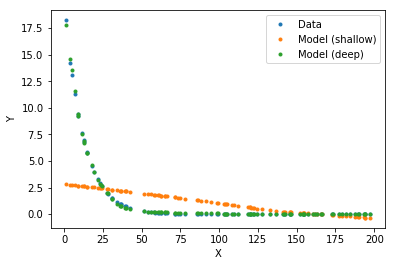

In [12]:
plt.plot(x,y,".",label="Data")
plt.plot(x,model_shallow.predict(x_sc.reshape(-1,1)),".",label="Model (shallow)")
plt.plot(x,model_deep.predict(x_sc.reshape(-1,1)),".",label="Model (deep)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

Seems that even for this simple problem, deep nets are performing better or are easier to train!